1. Download and store 1m/15m/30m/1h closing prices from solid/prospecting exchanges (Binance for now)
2. Feed it to the /modules
3. Store the results (there maybe are some global adjustments needed in order to lay down approptiate structure).
4. Build live running order exec
* think about volatility filter in further steps

In [ ]:
# maybe I should ommit the vectorised backtester and go with iterative straight away?

In [1]:
# CONFIG
report_dir = "TEST_1_REPORT"
ticker_intervals = ["30m", "15m", "1m"]

In [3]:
%load_ext autoreload

In [4]:
import os, sys
parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

from modules.CointAnalyzer import Coint_Analyzer
from modules.IterativeBacktester import IterativeBacktester



<h2 style="color:yellow;">CORR_COINT ANALYSIS</h2>

In [ ]:
coint_analyzer = Coint_Analyzer(
  raw_data_path="../raw_data/BINANCE_DOWNLOADER_TESTS/",
  closing_prices_container_paths=[
            "binance_historical_5m_FUTURES_cdcfc8f6-99fe-4124-acec-87acd320c321"],
  processed_data_path="../processed_data/ANALYZER_TEST/",
  interval="5m",
  days_filter=300,
  corr_filter=0.94,
  # cache_path="../processed_data/ANALYZER_TEST/CACHE_TESTS/coint_anal_cache_1h_244f32bd-dcca-484c-9b59-875a132d3dbd.csv"
)

In [ ]:
coint_analyzer.generate_co_matrices(vanilla_kalman=True, create_cache=True)

<h2 style="color:yellow;">ITERATIVE BACKETESTING</h2>

In [51]:
%autoreload

backtester = IterativeBacktester(
  pair=["ENJUSDT_FUTURES", "ZENUSDT_FUTURES"],
  ticker_interval="30m",
  raw_data_path="../raw_data/BINANCE_DOWNLOADER_TESTS/binance_historical_30m_FUTURES_6b1f260d-1873-417a-ae21-1317557f5930/",
  save_dir_path="../processed_data/BACKTESTER_TEST/",
  tc=0.0006
)

<h2 style="color: yellow">BIN<h2>

In [27]:
import numpy as np
import pandas as pd
from itertools import product

In [ ]:
backtester.optimize_pair(
  windows_range=(360, 500,190),
  short_entries_range=(99,100,1),
  long_entries_range=(2, 3, 1),
  sl_range=(-0.20, -0.03, 0.08),
  tp_range=(0.02, 0.03, 0.01),
  report=True,
  charts=True,
  cache_process=True,
  cache_path="../processed_data/BACKTESTER_TEST/ENJUSDT_FUTURES_ZENUSDT_FUTURES_30m/ENJUSDT_FUTURES_ZENUSDT_FUTURES_optimization_overview_cache.csv"
)

In [56]:
np.cumprod(1+backtester.result.net_returns)

Date
2021-09-01 00:30:00      1.000000
2021-09-01 01:00:00      1.000000
2021-09-01 01:30:00      1.000000
2021-09-01 02:00:00      1.000000
2021-09-01 02:30:00      1.000000
                          ...    
2022-11-19 11:30:00    271.050905
2022-11-19 12:00:00    271.050905
2022-11-19 12:30:00    271.050905
2022-11-19 13:00:00    271.050905
2022-11-19 13:30:00    271.050905
Freq: 30T, Name: net_returns, Length: 21339, dtype: float64

In [58]:
np.cumsum(backtester.result.net_returns)

Date
2021-09-01 00:30:00    0.000000
2021-09-01 01:00:00    0.000000
2021-09-01 01:30:00    0.000000
2021-09-01 02:00:00    0.000000
2021-09-01 02:30:00    0.000000
                         ...   
2022-11-19 11:30:00    5.966404
2022-11-19 12:00:00    5.966404
2022-11-19 12:30:00    5.966404
2022-11-19 13:00:00    5.966404
2022-11-19 13:30:00    5.966404
Freq: 30T, Name: net_returns, Length: 21339, dtype: float64

 13473 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13474 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13475 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13476 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13477 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13478 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13479 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13480 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13481 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13482 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13483 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13484 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13485 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13486 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13487 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13488 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13489 / 34812  CUM RET: 0.0%  CURENT NET: 0.0%  POS: 0
 13490 / 34812  CUM RET: 0.0%  CURENT NET: 0.0% 

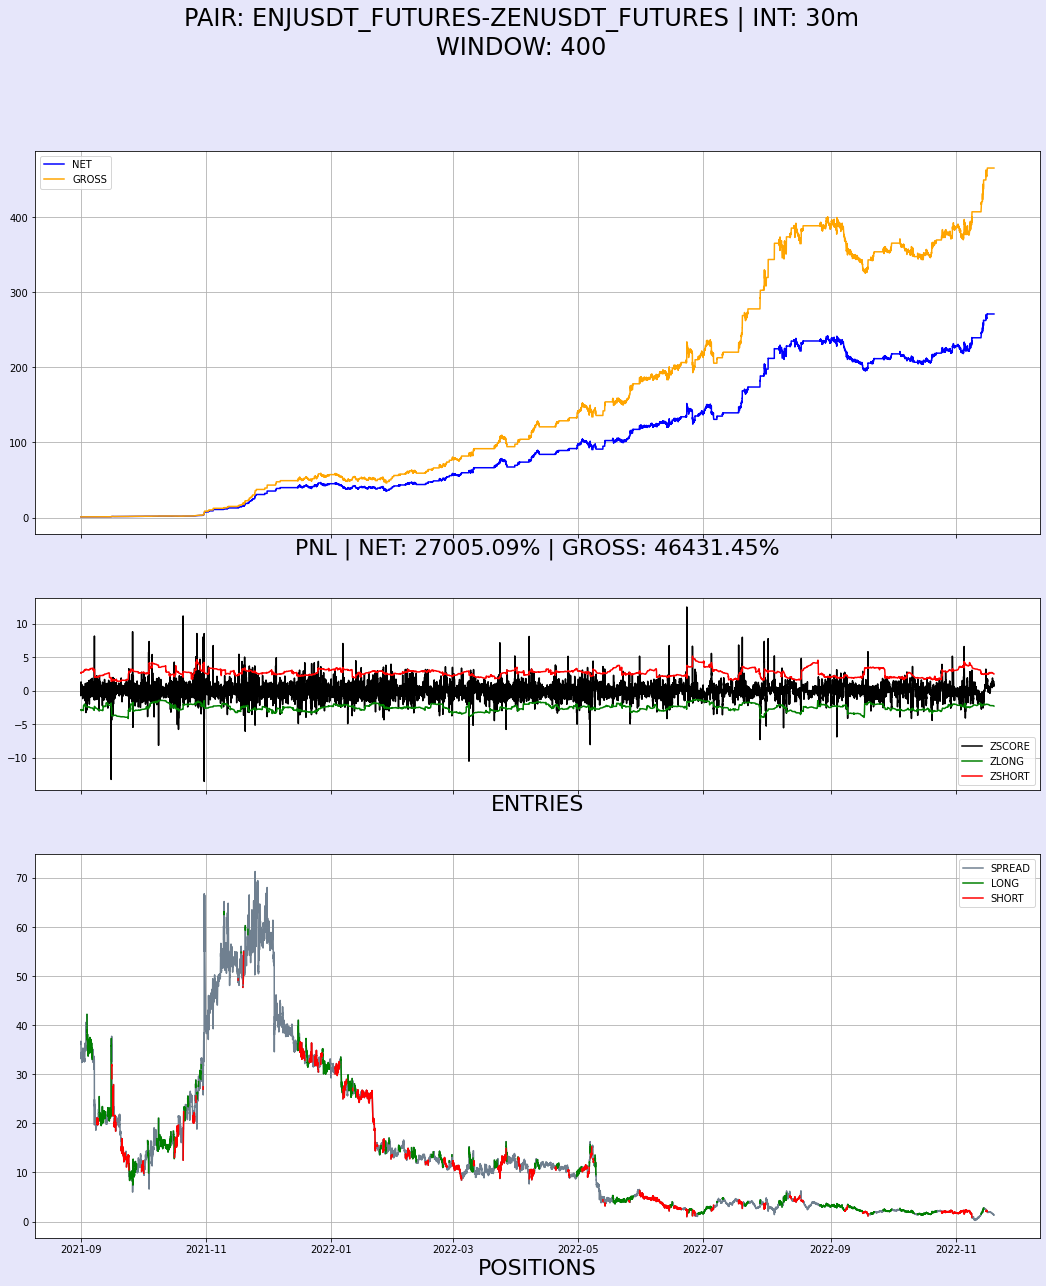

In [52]:
backtester.backtest_pair(
  z_long_perc=1,
  z_short_perc=99,
  tp=0.03,
  sl=-0.05,
  charts=True,
  silent=False,
  window=400,
  start_date="2021-09-01 00:00:00",
  stationarity_testing=False,
)

In [41]:
backtester.result.net_cum[-1]

6.005531692936703